**Sample Solution for Computational Physics II, Project 2**

**Numerical Integration of the 1D Diffusion Equation**

**Jan O. Haerter**

In [153]:
# importing standard libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

In [90]:
# defining system size and temporal range
nx = 1000
ny = 20
# r = D dt/dx^2
D = 1.
r = D # note that dt and dx are just set to unity, w.l.o.g.

# the probability field
P = np.zeros(nx)

# the banded matrix object
ab_ordered = np.zeros((3,nx))

# boundary conditions
cl = 0
cr = 0
#P[0] = cl
#P[nx-1] = cr
P[30] = 1
xvals = np.arange(0,nx)

In [91]:
# defining the banded matrix
ab_ordered[1,:] = 2*(1+r)
ab_ordered[0,2:] = -r
ab_ordered[2,:-2] = -r
ab_ordered[1,0] = 1
ab_ordered[1,-1] = 1

In [92]:
# the RHS of the Crank-Nicolson matrix equation
B = np.zeros(nx)
B[0] = cl
B[nx-1] = cr 
indices = np.arange(1,nx-1)
B[indices] = r*P[indices-1] + 2*(1-r)*P[indices] + r*P[indices+1]

**Project task 1.**

Set the delta distribution to be located at $n_x/2$. Plot $P(x,t=0)$.

Text(0, 0.5, '$Density, P(x,0)$')

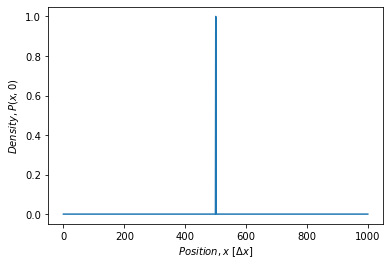

In [93]:
P = np.zeros(nx)
P[int(nx/2)] = 1
plt.plot(P)
plt.xlabel('$Position, x \,\,[\Delta x]$')
plt.ylabel('$Density, P(x,0)$')

**Project task 2.**

Using the solver to get the subsequent density $P_{next}$. Repeat $10^4$ times and plot $\langle x\rangle$ and $\langle x^2\rangle -\langle x\rangle^2$ vs. time. Also plot $P(x,t)$ for various values of $t$.

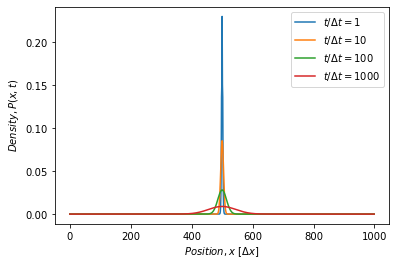

In [94]:
# integrating and computing some stats
nsteps = 10**4
sampling = 10
P = np.zeros(nx)
P[int(nx/2)] = 1
vrs = np.zeros(int(nsteps/sampling))
mns = np.zeros(int(nsteps/sampling))
tot = np.zeros(int(nsteps/sampling))
count = 0
for i in range(nsteps):
    B[indices] = r*P[indices-1] + 2*(1-r)*P[indices] + r*P[indices+1]
    x = solve_banded((1,1),ab_ordered,B)
    P = x
    # sampling statistics every 10 timesteps
    if (np.mod(i,sampling) == 0):
        mn = sum(xvals*P)
        vr = sum(xvals*xvals*P)
        mns[count] = mn
        vrs[count] = vr - mn*mn
        tot[count] = sum(P)
        count += 1
        
    if (i in [1,10,100,1000,10000]):
        plt.plot(P,label='$t/\Delta t=$'+str(i))

plt.xlabel('$Position, x \,\,[\Delta x]$')
plt.ylabel('$Density, P(x,t)$')
plt.legend()
plt.show()

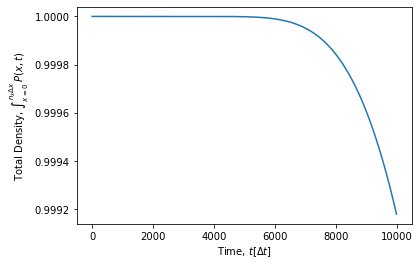

In [97]:
plt.plot(np.arange(len(tot))*sampling,tot)
plt.xlabel('Time, $t [\Delta t]$')
plt.ylabel('Total Density, $\int_{x=0}^{n_x\Delta x}\,P(x,t)$')
plt.show()

Let us check if the mean is conserved. 

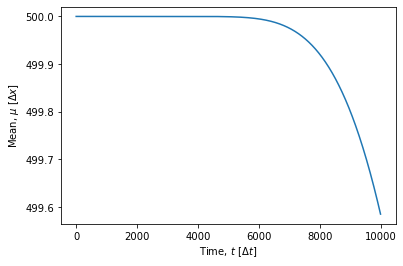

In [103]:
plt.plot(np.arange(len(mns))*sampling,mns)
plt.xlabel('Time, $t \,\, [\Delta t]$')
plt.ylabel('Mean, $\mu  \,\,[\Delta x]$')
plt.show()

It is found that it is very closely conserved. The slight departure can be due to the fact that the domain is not entirely symmetric w.r.t. the placement of the delta peak. Thus, some density will start leaking earlier on one end than on the other. An improvement can be obtained by using $n_x=1001$ instead of $n_x=1000$.

For the variance we expect the scaling $\sigma^2=2Dt$, and we set $D=1$ above. 
Let us confirm this dependency.

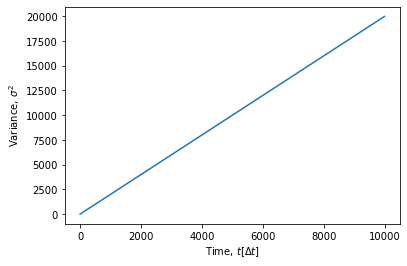

In [105]:
plt.plot(np.arange(len(vrs))*sampling,vrs)
plt.xlabel('Time, $t [\Delta t]$')
plt.ylabel('Variance, $\sigma^2$')
plt.show()

**Project task 3**

Shifting the boundary to $x/\Delta x=10$. Plotting the same quantities, but also change in density.

Note the Smirnov density, defined in class (see lecture notes, Chapter 1)

$ f(t;x_c)=2f_1(t;x_c)=\frac{x_c}{\sqrt{4\pi Dt^3}}\exp\left(-\frac{x_c^2}{4Dt}\right)$

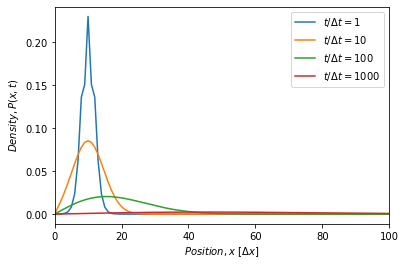

In [127]:
# integrating and computing some stats
nsteps = 10**4
sampling = 1
P = np.zeros(nx)
P[10] = 1
vrs = np.zeros(int(nsteps/sampling))
mns = np.zeros(int(nsteps/sampling))
tot = np.zeros(int(nsteps/sampling))
count = 0
for i in range(nsteps):
    B[indices] = r*P[indices-1] + 2*(1-r)*P[indices] + r*P[indices+1]
    x = solve_banded((1,1),ab_ordered,B)
    P = x
    # sampling statistics every 10 timesteps
    if (np.mod(i,sampling) == 0):
        tot[count] = sum(P)
        mn = sum(xvals*P)/tot[count]
        vr = sum(xvals*xvals*P)/tot[count]
        mns[count] = mn
        vrs[count] = vr - mn*mn
        count += 1
        
    if (i in [1,10,100,1000,10000]):
        plt.plot(P,label='$t/\Delta t=$'+str(i))

plt.xlabel('$Position, x \,\,[\Delta x]$')
plt.ylabel('$Density, P(x,t)$')
plt.xlim(0,100)
plt.legend()
plt.show()

Note that there is some unevenness in the distribution for $t/\Delta t =1$, which we will revisit later when changing $r$.

Plotting the mean position according to the **remaining** density.

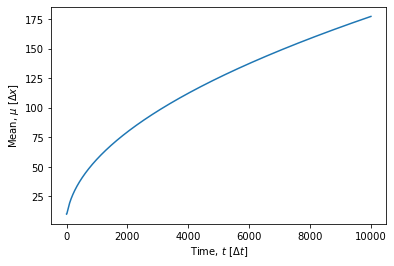

In [128]:
plt.plot(np.arange(len(mns))*sampling,mns)
plt.xlabel('Time, $t \,\, [\Delta t]$')
plt.ylabel('Mean, $\mu  \,\,[\Delta x]$')
plt.show()

Plotting also the variance according to the remaining density.

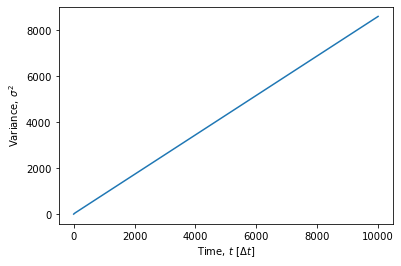

In [129]:
plt.plot(np.arange(len(vrs))*sampling,vrs)
plt.xlabel('Time, $t \,\, [\Delta t]$')
plt.ylabel('Variance, $\sigma^2$')
plt.show()

Plotting the total remaining density as function of time. 

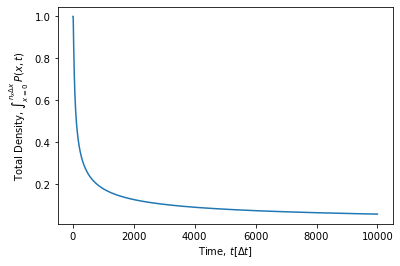

In [130]:
plt.plot(np.arange(len(tot))*sampling,tot)
plt.xlabel('Time, $t [\Delta t]$')
plt.ylabel('Total Density, $\int_{x=0}^{n_x\Delta x}\,P(x,t)$')
plt.show()

Plotting the change in density, $P_{tot,curr}-P_{tot,next}$ as function of time. This is the Smirnov density discussed in class.

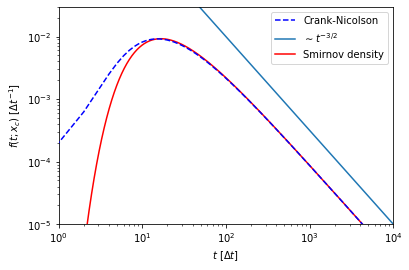

In [138]:
# plotting the Smirnov density
dat = mns[mns>0]
le = len(dat)
plt.plot(-tot[1:le-1]+tot[0:le-2],'b--',zorder=10,label='Crank-Nicolson')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1,10**4)
plt.ylim(10**(-5),.03)
dummy = np.arange(10**0,10**5,10)
dummy1 = np.logspace(0,5,1000)
plt.plot(dummy,10*dummy**(-3/2),label='$\sim t^{-3/2}$')
plt.plot(dummy1,10/np.sqrt(4*D*np.pi*dummy1**3)*np.exp(-10**2/(4*D*dummy1)),'r',label='Smirnov density')
plt.xlabel('$t \,\,[\Delta t]$')
plt.ylabel('$f(t;x_c) \,\,[\Delta t^{-1}]$')
plt.legend()
plt.show()

The comparison with the exact Smirnov density and the power law tail (see above) is reasonable, yet, at small times there is a discrepancy between the exact and the numerical result. This may be due to the too coarse timestep, i.e. too large value of $r$. 

**Project task 4**

Reducing the value of $r$ to $r=.1$. This can either be interpreted as reducing the timestep by a factor 10 or as reducing the diffusion coefficient by a factor 10 (or as increasing the spatial scale by a factor $10^{1/2}$).

In [148]:
D = .1
r = D
# defining the banded matrix
ab_ordered[1,:] = 2*(1+r)
ab_ordered[0,2:] = -r
ab_ordered[2,:-2] = -r
ab_ordered[1,0] = 1
ab_ordered[1,-1] = 1

In [149]:
# the RHS of the Crank-Nicolson matrix equation
B = np.zeros(nx)
B[0] = cl
B[nx-1] = cr 
indices = np.arange(1,nx-1)
B[indices] = r*P[indices-1] + 2*(1-r)*P[indices] + r*P[indices+1]

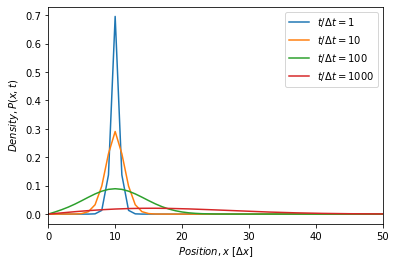

In [152]:
# integrating and computing some stats
nsteps = 10**4
sampling = 1
P = np.zeros(nx)
P[10] = 1
vrs = np.zeros(int(nsteps/sampling))
mns = np.zeros(int(nsteps/sampling))
tot = np.zeros(int(nsteps/sampling))
count = 0
for i in range(nsteps):
    B[indices] = r*P[indices-1] + 2*(1-r)*P[indices] + r*P[indices+1]
    x = solve_banded((1,1),ab_ordered,B)
    P = x
    # sampling statistics every 10 timesteps
    if (np.mod(i,sampling) == 0):
        tot[count] = sum(P)
        mn = sum(xvals*P)/tot[count]
        vr = sum(xvals*xvals*P)/tot[count]
        mns[count] = mn
        vrs[count] = vr - mn*mn
        count += 1
        
    if (i in [1,10,100,1000,10000]):
        plt.plot(P,label='$t/\Delta t=$'+str(i))

plt.xlabel('$Position, x \,\,[\Delta x]$')
plt.ylabel('$Density, P(x,t)$')
plt.xlim(0,50)
plt.legend()
plt.show()

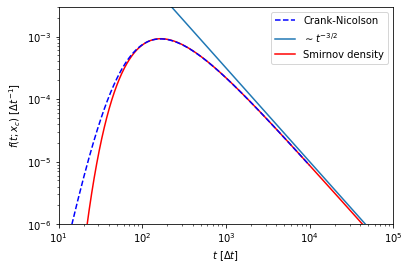

In [147]:
# plotting the Smirnov density
dat = mns[mns>0]
le = len(dat)
plt.plot(-tot[1:le-1]+tot[0:le-2],'b--',zorder=10,label='Crank-Nicolson')
plt.yscale('log')
plt.xscale('log')
plt.xlim(10,10**5)
plt.ylim(10**(-6),.003)
dummy = np.arange(10**0,10**5,10)
dummy1 = np.logspace(0,5,1000)
plt.plot(dummy,10*dummy**(-3/2),label='$\sim t^{-3/2}$')
plt.plot(dummy1,10/np.sqrt(4*D*np.pi*dummy1**3)*np.exp(-10**2/(4*D*dummy1)),'r',label='Smirnov density')
plt.xlabel('$t \,\,[\Delta t]$')
plt.ylabel('$f(t;x_c) \,\,[\Delta t^{-1}]$')
plt.legend()
plt.show()